<a href="https://colab.research.google.com/github/ogabrielrocha/gabriel_rocha_data_science/blob/main/An%C3%A1lise_de_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Primeira Análise por Data Science**
*by [Gabriel Rocha](https://www.linkedin.com/in/gabriel-rocha-b77ab316b/)*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto, localizada no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados foram obtidos através do Site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 

Como uma análise inicial, será feito o download apenas do seguinte arquivo: 

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-04-09/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificação do imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do dono do imóvel
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo Dono
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.10,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,94,180,169,2013-08-27,1.19,2,365
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2019-12-22,1.64,2,365
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-08-30,0.20,1,42
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,NaN,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,50,30,7,2018-10-17,0.10,1,339


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora que temos a ideia que como nossos dados estão distribuídos, vamos analisar a quantidade de entradas e quais tipos existem nas colunas.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	15542
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para termos um *dataset* de qualidade e confiável precisamos ter atenção à quantidade de valores ausentes. Precisaremos fazer uma breve análise logo de início para termos certeza se esses valores nulos são importantes e significativos comparados ao número de entradas que temos.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente de valores nulos 23%.
* E as variáveis `host_name` e `name` possuem respectivamente 2.6% e 0,0064%, aproximadamente dos valores nulos.                                       

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.230987
last_review                       0.230987
host_name                         0.026831
name                              0.000064
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para analisarmos como se encontra a distribuição de variáveis, plotaremos o gráfico de histograma.

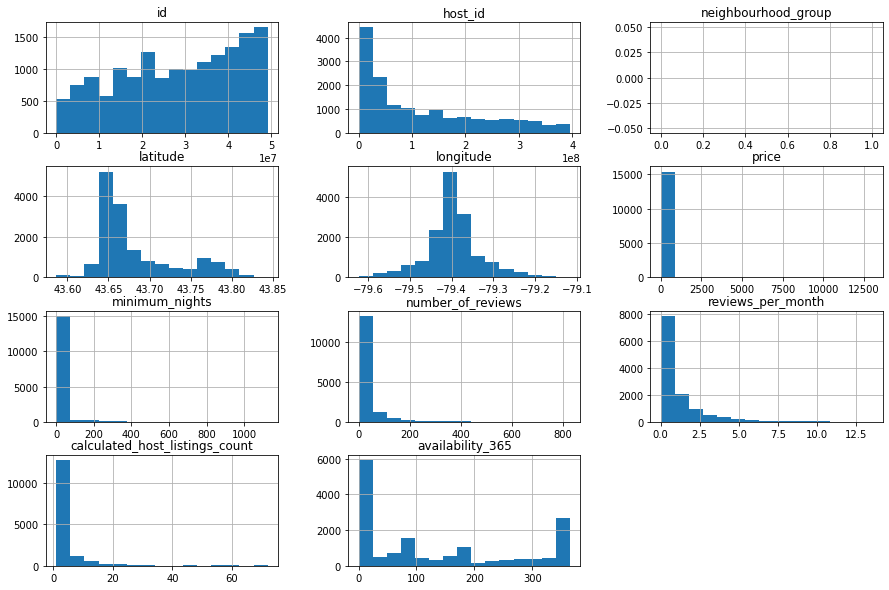

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Nessa etapa solicitaremos detalhes apenas da coluna de preço *("price")* e vemos que em "mean" a média dos aluguéis está em torno de `$144,96`. 

In [ ]:
# ver a média da coluna `price`
df[['price']].describe()

,price
count,15542.000000
mean,144.959079
std,381.364914
min,0.000000
25%,60.000000
50%,96.000000
75%,150.000000
max,13000.000000


### **Q4. Qual a correlação existente entre as variáveis**

Aqui tentaremos visualizar se há alguma relação entre duas variáveis, ou seja, se alguma variável influencia na outra. Nesse contexto tentaremos encontrar relação ou semelhança.

Podemos medir essa relação com a função do coeficiente de correlação e estabelecer qual sua intensidade. Para isso farei:
* Uma matriz de correlação
* Um *heatmap* a partir dessa matriz, fazendo o uso da biblioteca `seaborn`.

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.028216,-0.014426,-0.008901,-0.003718,-0.004902
minimum_nights,0.028216,1.000000,-0.065210,-0.122562,-0.034696,0.052570
number_of_reviews,-0.014426,-0.065210,1.000000,0.777267,-0.062792,0.046541
reviews_per_month,-0.008901,-0.122562,0.777267,1.000000,-0.047293,0.051597
calculated_host_listings_count,-0.003718,-0.034696,-0.062792,-0.047293,1.000000,0.164349
availability_365,-0.004902,0.052570,0.046541,0.051597,0.164349,1.000000


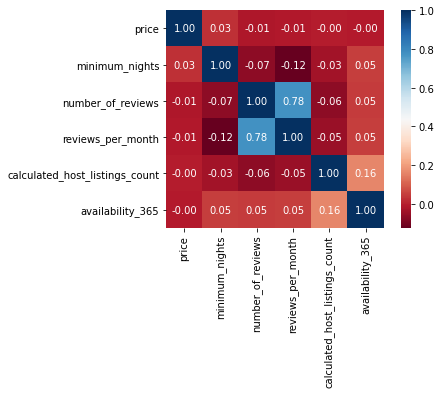

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em Toronto?**

A coluna `room_type`nos diz qual o tipo de locação que está anunciada no AirBnb. Caso você já tenha passado pela experiência de alugar pelo site, sabe que existem opções como apartamentos ou casas inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com alguém.

Usando o método `value_counts()` descobriremos a contagem de cada tipo.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    9959
Private room       5305
Shared room         230
Hotel room           48
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.640780
Private room       0.341333
Shared room        0.014799
Hotel room         0.003088
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Toronto?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Annex                                319.039293
Woburn                               304.081967
Forest Hill South                    264.818182
Palmerston-Little Italy              240.683398
Rustic                               227.000000
Rosedale-Moore Park                  217.000000
Waterfront Communities-The Island    205.939194
Lawrence Park South                  199.463415
Kingsway South                       196.100000
Yonge-St.Clair                       191.102041
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

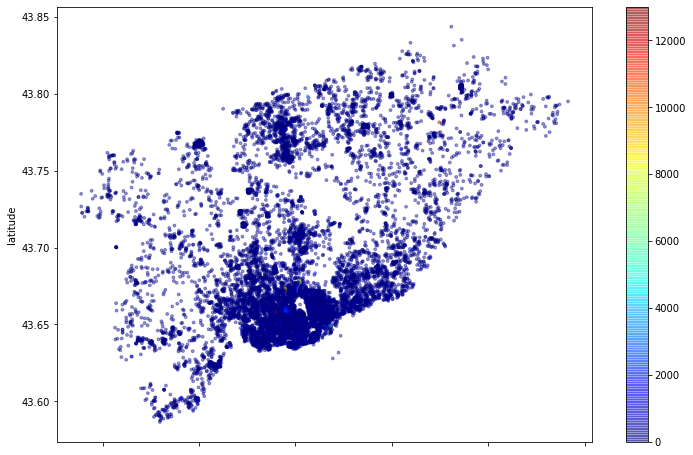

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Usando a mesma ideia feita anteriormente para ter a média de preço dos aluguéis em Toronto, poderemos fazer o mesmo para descobrir a média do mínimo de noites `minimium_nights`, apenas usando a função `.describe()` e analisando a linha "mean".

In [ ]:
# ver a média da coluna `minimum_nights`
df[['minimum_nights']].describe()

,minimum_nights
count,15542.000000
mean,27.755759
std,38.968903
min,1.000000
25%,28.000000
50%,28.000000
75%,28.000000
max,1125.000000


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já podemos perceber alguns problemas com determinadas variáveis como a média do minimo de noites ser 27, poderemos checar agora com mais detalhes a existência de *outliers* e sua retirada da análise. 

Também notamos que algumas variáveis possuem muitos *outliers*, para evitar ao máximo a distorção da realidade a retirada deles é recomendada.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, usando o `listings.csv.gz` também encontrado no site que foi retirado o arquivo usado nessa análise